In [550]:
# https://raw.githubusercontent.com/akshaybhatia95/CombinedCycleDataSet/master/CCPP/Folds5x2_pp.xlsx
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as sm2
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math as  m
from sklearn.model_selection import train_test_split

Q1 a)Download the Combined Cycle Power Plantdata from:https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [551]:
xl=pd.ExcelFile('https://raw.githubusercontent.com/akshaybhatia95/CombinedCycleDataSet/master/CCPP/Folds5x2_pp.xlsx')
data=pd.read_excel(xl,'Sheet1',index=False)
data

AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
5     26.27  59.44  1012.23  58.77  443.67
6     15.89  43.96  1014.02  75.24  467.35
7      9.48  44.71  1019.12  66.43  478.42
8     14.64  45.00  1021.78  41.25  475.98
9     11.74  43.56  1015.14  70.72  477.50
10    17.99  43.72  1008.64  75.04  453.02
11    20.14  46.93  1014.66  64.22  453.99
12    24.34  73.50  1011.31  84.15  440.29
13    25.71  58.59  1012.77  61.83  451.28
14    26.19  69.34  1009.48  87.59  433.99
15    21.42  43.79  1015.76  43.08  462.19
16    18.21  45.00  1022.86  48.84  467.54
17    11.04  41.74  1022.60  77.51  477.20
18    14.45  52.75  1023.97  63.59  459.85
19    13.97  38.47  1015.15  55.28  464.30
20    17.76  42.42  1009.09  66.26  468.27
21     5.41  40.07  1019.16  64.77  495.24
22     7.76  42.28  1008.52  83.31  483.80
23    27.23  63.90  1014.30  47.19  443.61
24    27.36  48.60  1003.18  54.93  436.06
25    27.47  70.72  1009.97  74.62  443.25
26    14.60  39.31  1011.11  72.52  464.16
27     7.91  39.96  1023.57  88.44  475.52
28     5.81  35.79  1012.14  92.28  484.41
29    30.53  65.18  1012.69  41.85  437.89
...     ...    ...      ...    ...     ...
9538   8.64  38.56  1016.51  66.03  484.45
9539  10.53  37.50  1008.55  99.91  472.32
9540  23.53  50.05  1005.63  78.40  443.71
9541  24.90  67.25  1017.77  66.17  433.71
9542   5.01  39.40  1003.69  91.90  475.34
9543  22.66  69.84  1006.16  82.79  439.06
9544  29.76  57.19  1008.59  51.10  436.21
9545  26.30  61.41  1012.45  56.85  448.55
9546  30.17  74.22  1007.46  49.27  432.00
9547   8.02  40.23  1017.42  90.26  484.22
9548  19.12  50.16  1011.52  99.71  451.49
9549  14.87  42.18  1015.23  74.41  465.89
9550   9.71  42.44  1014.29  94.03  481.03
9551  24.33  77.54  1008.50  82.45  435.38
9552   7.17  39.40  1011.48  90.38  484.33
9553  24.61  62.96  1020.10  63.83  445.79
9554  23.48  66.44  1011.28  61.11  443.21
9555  23.70  70.32  1007.21  66.85  439.59
9556  25.44  69.59  1008.22  80.73  433.97
9557  17.46  62.10  1019.96  83.99  451.06
9558  22.97  62.40  1010.25  75.18  445.30
9559  26.22  49.82  1015.48  55.80  454.20
9560  23.27  68.28  1005.01  74.83  444.86
9561  11.76  41.58  1020.91  88.35  465.45
9562  14.02  40.10  1015.56  82.44  467.32
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]

(b)Exploring the data: i) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [552]:
print("Size of the columns: ", data.shape[1])
print("Size of the rows: ", data.shape[0],"\n")
print("The columns are described as: Temperature (AT), Ambient Pressure (AP),Relative Humidity (RH) and Exhaust Vacuum (V)" 
      ," the net hourly electricalenergy output (PE) of the plant.\n")
print("The rows are described as: The values calculated for each of the parameter(columns) described above.", 
      "Each row is called a data point which is an instance of the column names.")

Size of the columns:  5
Size of the rows:  9568 

The columns are described as: Temperature (AT), Ambient Pressure (AP),Relative Humidity (RH) and Exhaust Vacuum (V)  the net hourly electricalenergy output (PE) of the plant.

The rows are described as: The values calculated for each of the parameter(columns) described above. Each row is called a data point which is an instance of the column names.


ii.Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

The linear relationship between PE and AT is good.
The linear relationship between PE and V is okay.
The linear relationship between PE and AP is worse.
The linear relationship between PE and RH is worst.


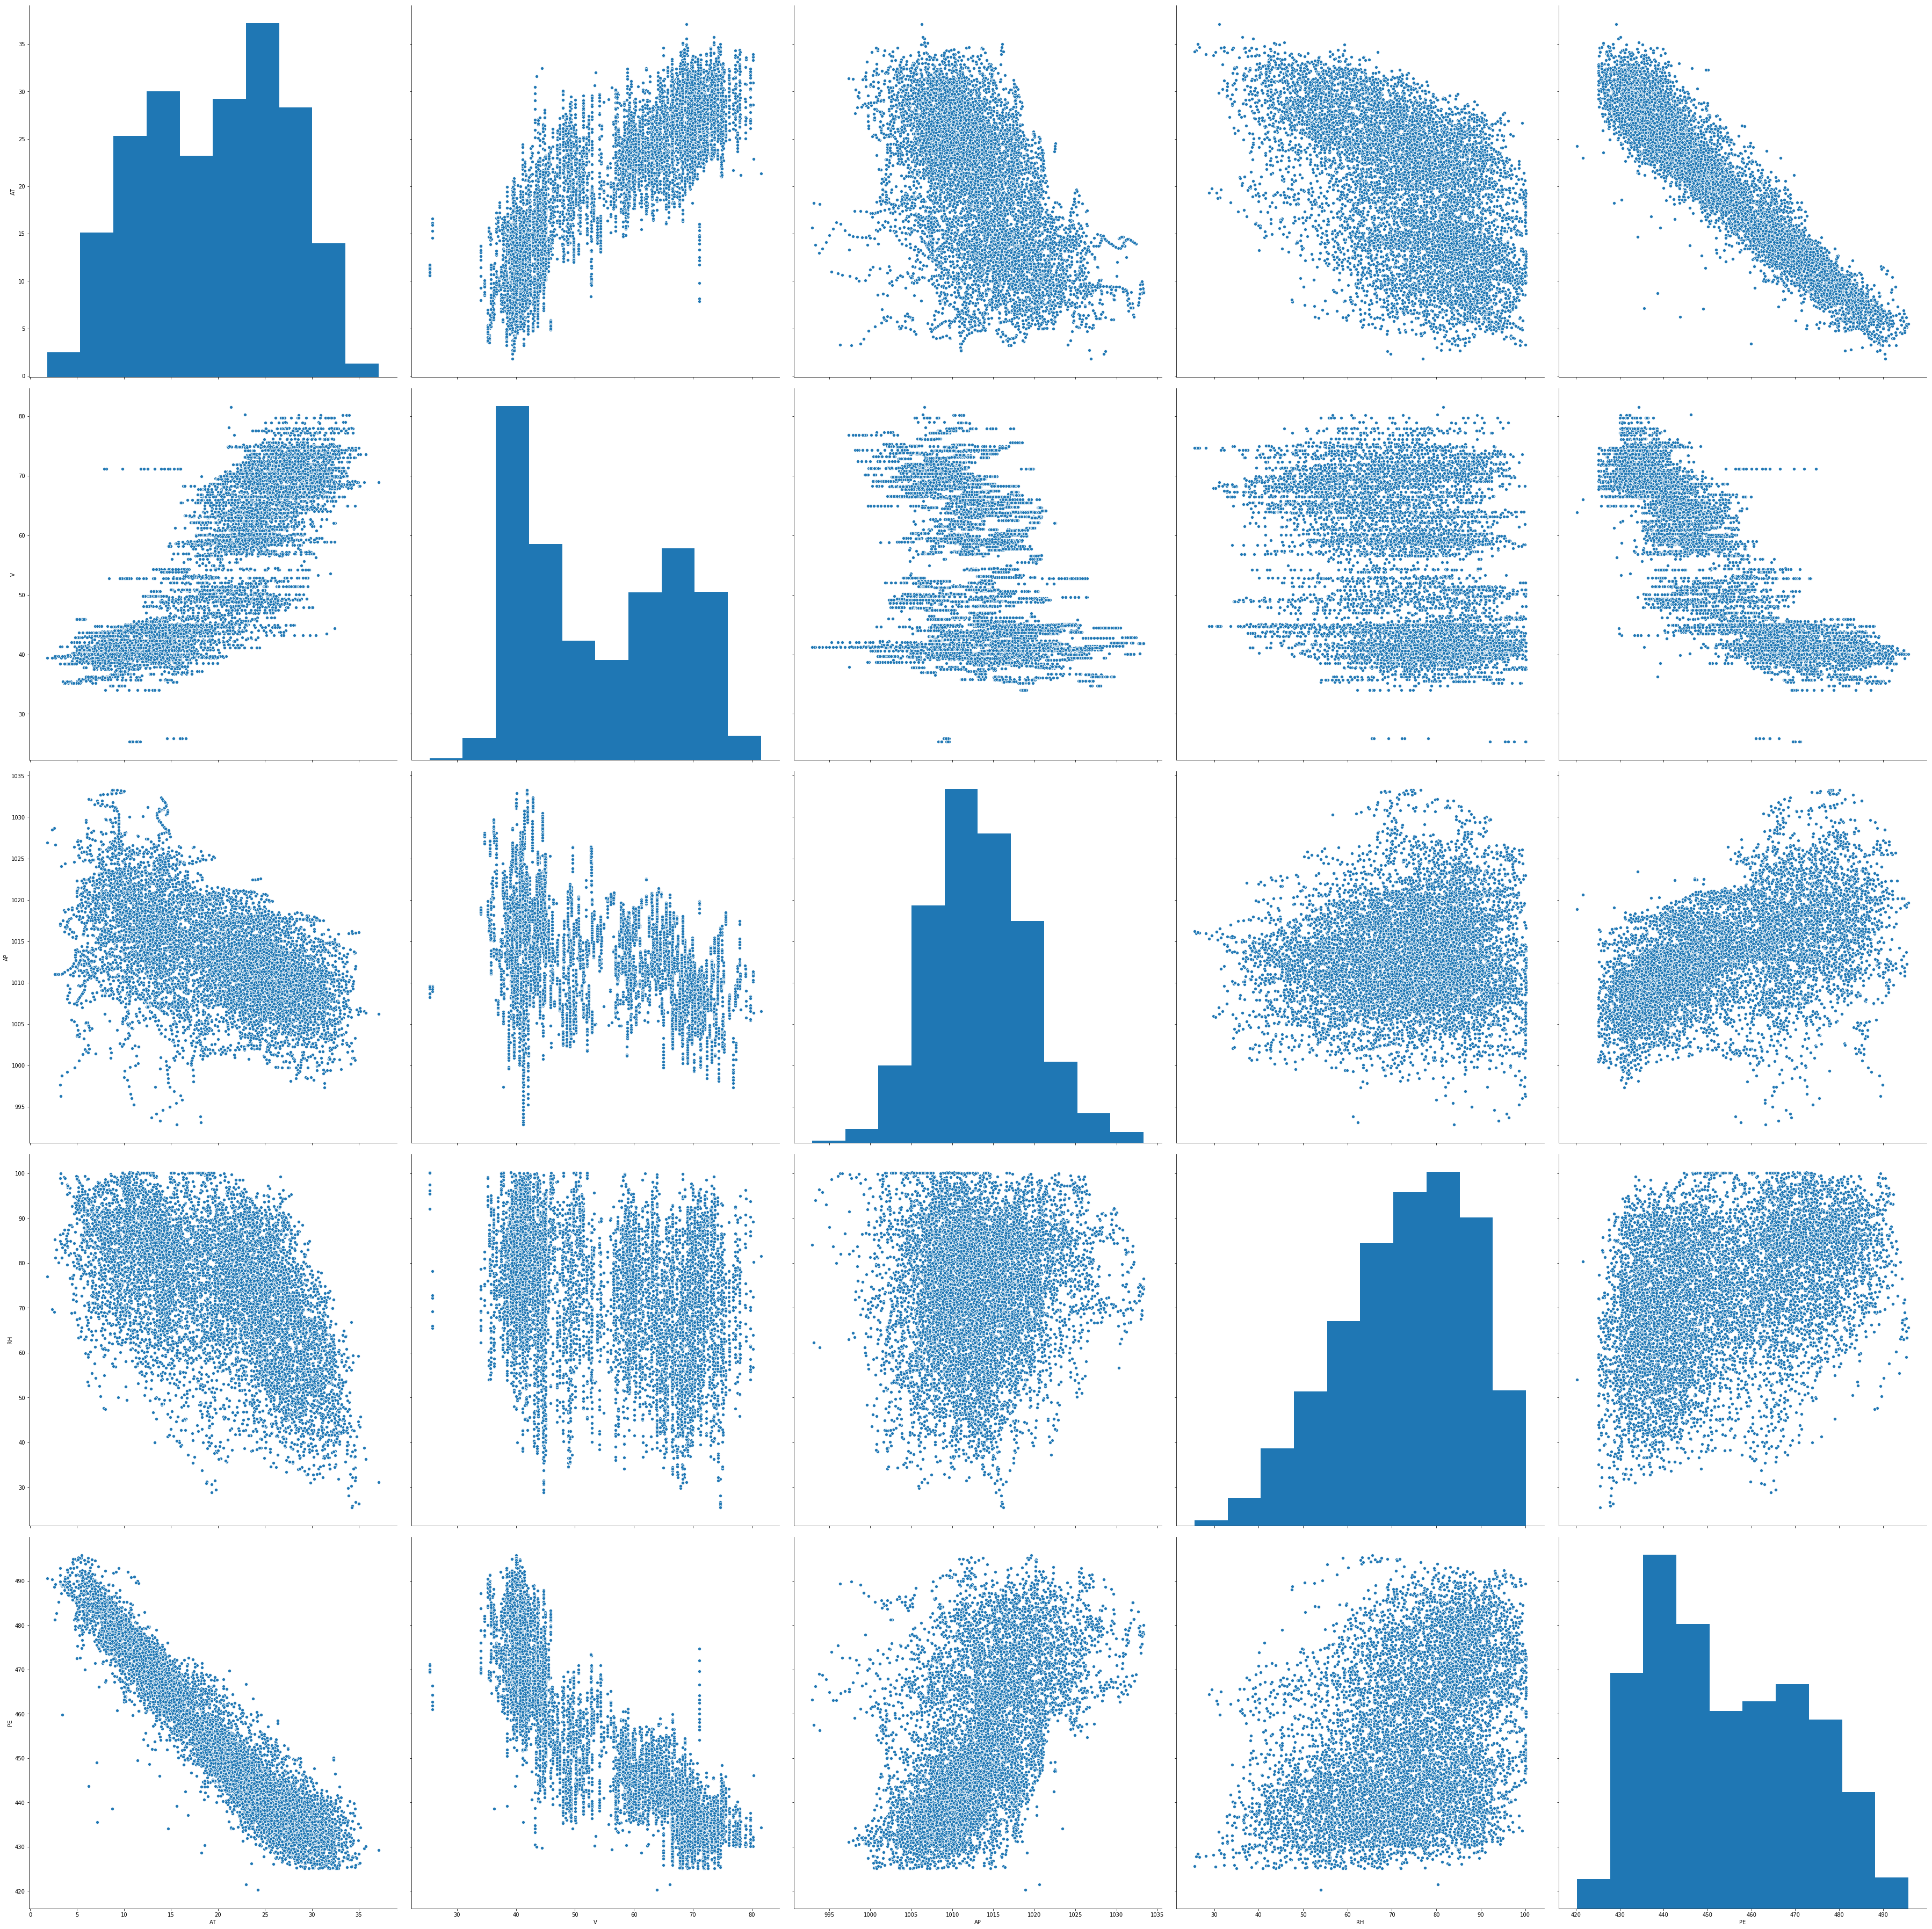

In [553]:
colnames=['AT','V','AP','RH','PE']
sns.pairplot(data,vars=colnames,kind='scatter',height=10)
print("The linear relationship between PE and AT is good.")
print("The linear relationship between PE and V is okay.")
print("The linear relationship between PE and AP is worse.")
print("The linear relationship between PE and RH is worst.")

iii.What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [554]:
mean=data.mean()
median=data.median()
data_range=data.max()-data.min()
first_quartile=data.quantile(0.25)
third_quartile=data.quantile(0.75)
IQR=third_quartile-first_quartile
tab = {'data':['mean','median','range','first quartile','third quartile','interquartile ranges'],
        'AT':[mean[0],median[0],data_range[0],first_quartile[0], third_quartile[0], IQR[0]], 
        'V':[mean[1],median[1],data_range[1],first_quartile[1], third_quartile[1], IQR[1]],
        'AP':[mean[2],median[2],data_range[2],first_quartile[2], 
third_quartile[2], IQR[2]],
        'RH':[mean[3],median[3],data_range[3],first_quartile[3], third_quartile[3], IQR[3]],
        'PE':[mean[4],median[4],data_range[4],first_quartile[4], third_quartile[4], IQR[4]]}
pd.DataFrame(tab)

data         AT          V           AP         RH  \
0                  mean  19.651231  54.305804  1013.259078  73.308978   
1                median  20.345000  52.080000  1012.940000  74.975000   
2                 range  35.300000  56.200000    40.410000  74.600000   
3        first quartile  13.510000  41.740000  1009.100000  63.327500   
4        third quartile  25.720000  66.540000  1017.260000  84.830000   
5  interquartile ranges  12.210000  24.800000     8.160000  21.502500   

           PE  
0  454.365009  
1  451.550000  
2   75.500000  
3  439.750000  
4  468.430000  
5   28.680000

(c)For each predictor, fit a simple linear regression model to predict the response.Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to backup your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

C:\Users\D\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AT   [-2.17131996]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:34:14   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156 

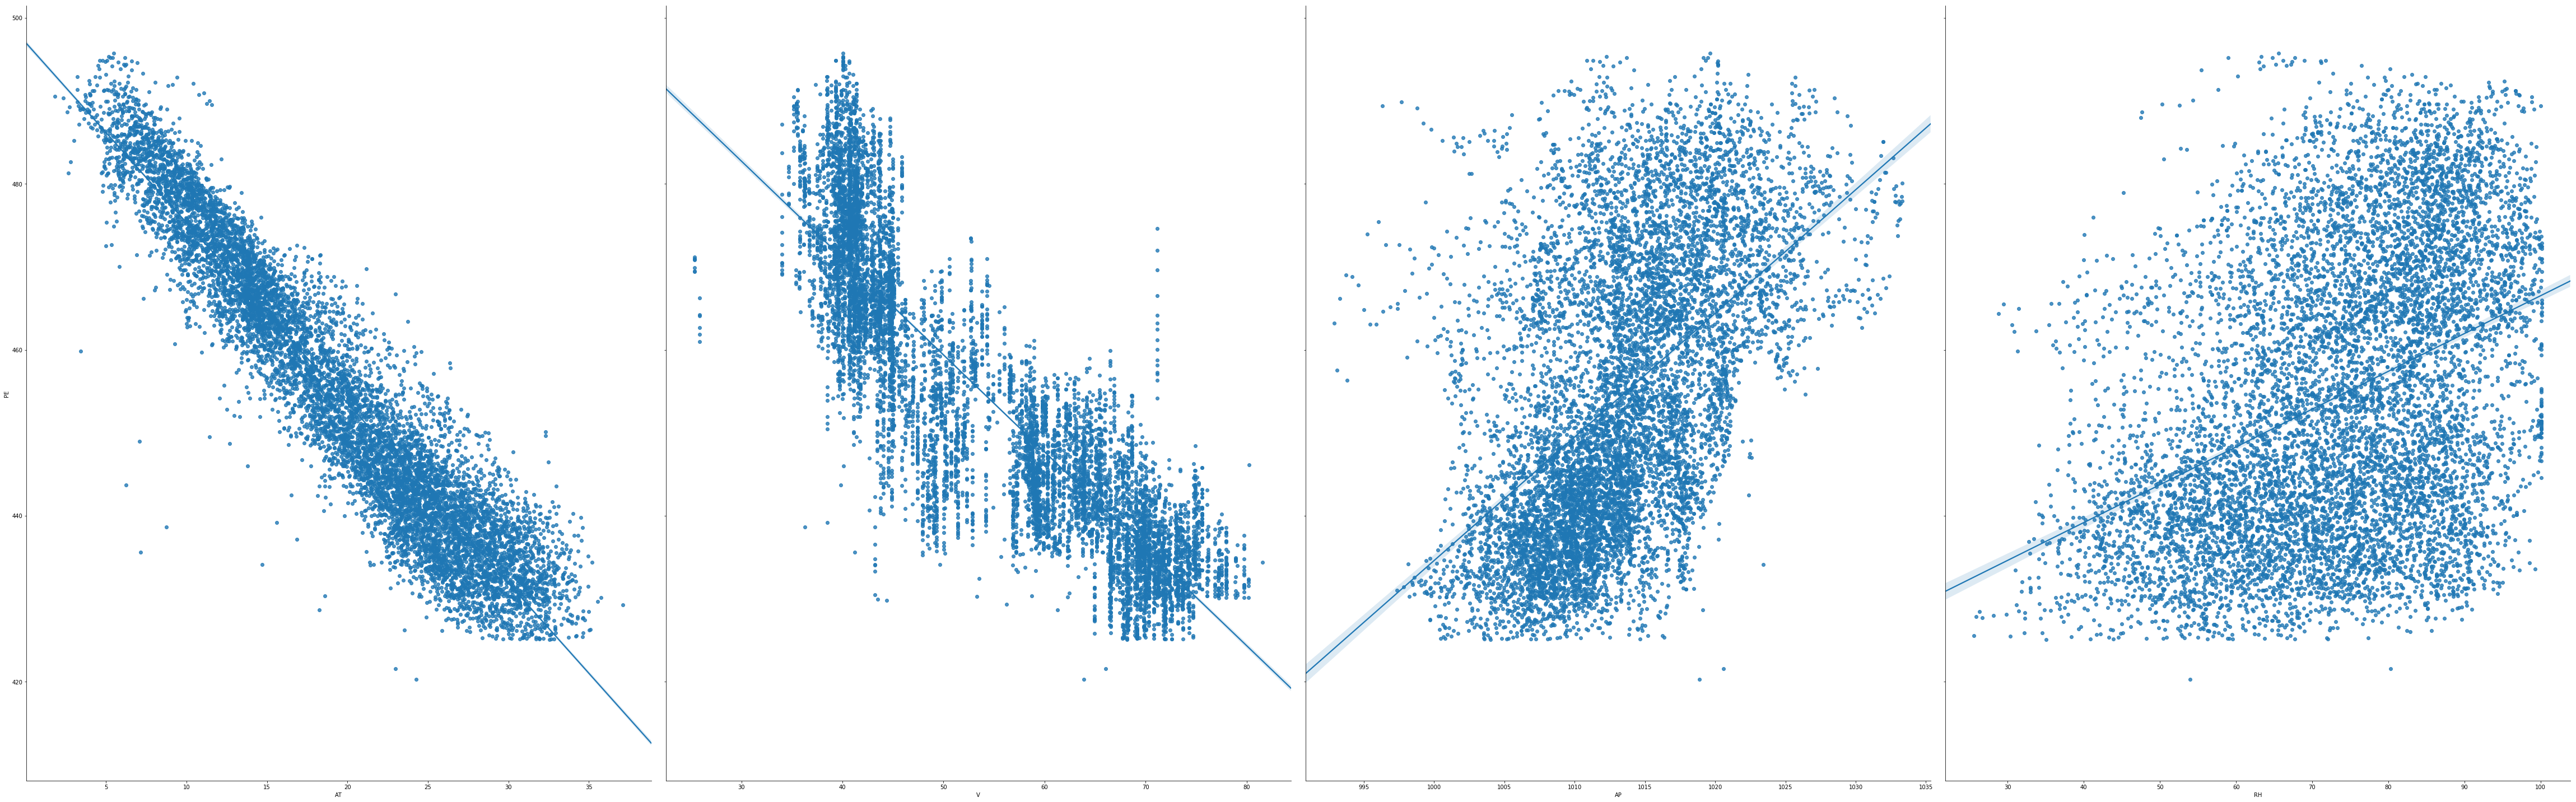

In [555]:
trainy=data['PE']
lr=LinearRegression()
single_coeff=np.zeros((1,4))
i=0
x_vars=['AT','V','AP','RH']

sns.pairplot(data,x_vars=['AT','V','AP','RH'],y_vars='PE',height=20,aspect=0.8,kind='reg')

for curr in x_vars:
    trainx=data[[curr]]
    curr_model=lr.fit(trainx,trainy)
    print(curr," ",lr.coef_)
    single_coeff[0][i]=(lr.coef_[0])
    trainx_values=trainx.values
    trainx_reshaped=trainx_values.reshape(-1, 1)
    trainx_const=sm.add_constant(trainx_reshaped)
    trainy_values = trainy.values
    trainy_reshaped = trainy_values.reshape(-1, 1)
    i+=1
    
    stats=sm.OLS(trainy_values,trainx_const).fit()
    print(stats.summary())
print(" ")    
print("In all the models,the relationship between predictor and response is statistically significant")
print("Yes, there are outliers that can be removed from the data.")
print(" ")

(d)Fit a multiple regression model to predict the response using all of the predictors.Describe your results. For which predictors can we reject the null hypothesis H0:βj= 0?

In [556]:
lr=LinearRegression()
trainx=data.loc[:,data.columns!="PE"]
trainy=data.loc[:,data.columns=="PE"]

lr_model=lr.fit(trainx,trainy)
print("The score of the regression is",lr_model.score(trainx,trainy))
print("The coefficients are: ",lr_model.coef_)
multi_coeff=lr_model.coef_
trainx_const=sm.add_constant(trainx)
print(sm.OLS(trainy,trainx).fit().summary())
print()
print("We can reject the null hypothesis for all the predictors since the p values are 0 for each one of them making them statistically significant")

The score of the regression is 0.9286960898122536
The coefficients are:  [[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]]
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.939e+07
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:34:26   Log-Likelihood:                -29068.
No. Observations:                9568   AIC:                         5.814e+04
Df Residuals:                    9564   BIC:                         5.817e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

e)How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

Text(0.5, 1.0, 'Plot of coefficients of predictors from univariate regression and multivariate regression')

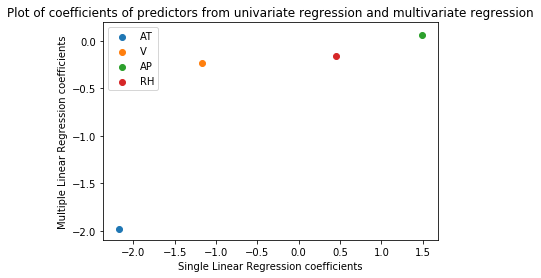

In [557]:
plt.scatter(single_coeff[0][0],multi_coeff[0][0],label="AT")
plt.scatter(single_coeff[0][1],multi_coeff[0][1],label="V")
plt.scatter(single_coeff[0][2],multi_coeff[0][2],label="AP")
plt.scatter(single_coeff[0][3],multi_coeff[0][3],label="RH")
plt.legend()
plt.xlabel("Single Linear Regression coefficients")
plt.ylabel("Multiple Linear Regression coefficients")
plt.title("Plot of coefficients of predictors from univariate regression and multivariate regression")

(f)Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form: Y=β0+β1X+β2X2+β3X3+∈

In [558]:
def poly(data,curr):
    print(curr)
    print(" ")
    lr_model=sm2.ols(formula='PE ~ %s + I(%s** 2) + I(%s** 3)'% (curr, curr, curr),data=data).fit()
    print(lr_model.summary())
for curr in x_vars:
    poly(data,curr)
    
print("Yes, there is non linear association between AT,AP and RH but there is no non linear relationship between V and the response")
    

AT
 
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:34:35   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248    

(g)Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [559]:
data=pd.read_excel(xl,'Sheet1',index=False)
trainY=data['PE'].values
trainX=data[['AT','V','AP','RH']]
pair1=data['AT'].values*data['V'].values
frame1=pd.DataFrame(pair1,columns=['AT*V'])
pair2=data['AT'].values*data['AP'].values
frame2=pd.DataFrame(pair2,columns=['AT*AP'])
pair3=data['AT'].values*data['RH'].values
frame3=pd.DataFrame(pair3,columns=['AT*RH'])
pair4=data['V'].values*data['AP'].values
frame4=pd.DataFrame(pair4,columns=['V*AP'])
pair5=data['V'].values*data['RH'].values
frame5=pd.DataFrame(pair5,columns=['V*RH'])
pair6=data['AP'].values*data['RH'].values
frame6=pd.DataFrame(pair6,columns=['AP*RH'])

frames=[trainX,frame1,frame2,frame3,frame4,frame5,frame6]
pair_data=pd.concat(frames,axis=1)
pair_data=sm.add_constant(pair_data)

lr_model=sm.OLS(trainY,pair_data).fit()
print(lr_model.summary())
print("\n")
print("AT*V,AT*RH and V*AP are statistically significant")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:34:37   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

(h)Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities,and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [560]:
train_data, test_data = train_test_split(data, test_size=0.3,random_state=0)

In [561]:
lr_model1=sm2.ols(formula='PE ~ AT+V+AP+RH+AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH+I(AT**2)+I(V**2)+I(AP**2)+I(RH**2)',data=train_data).fit()
lr_model2=sm2.ols(formula='PE ~ AT+V+AP+RH',data=train_data).fit()

In [562]:
print(lr_model1.summary())
print()
print("\n In the quadractic model the terms,AT*AP,V*AP,V*RH,V**2 are insignificant \n")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:34:37   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7073.1567   1505.522     -4.698      0.0

In [563]:
print("Multiple linear regression model")
print(lr_model2.summary())

Multiple linear regression model
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:34:37   Log-Likelihood:                -19688.
No. Observations:                6697   AIC:                         3.939e+04
Df Residuals:                    6692   BIC:                         3.942e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    448.56

In [564]:
print("Revised model without insignificant variables")
new_lr_model1=sm2.ols(formula='PE ~ AT+V+AP+RH+AT*V+AT*RH+AP*RH+I(AT**2)+I(AP**2)+I(RH**2)',data=train_data).fit()
print(new_lr_model1.summary())

Revised model without insignificant variables
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9892.
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:34:38   Log-Likelihood:                -19255.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6686   BIC:                         3.861e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interc

In [565]:
basic_model_train_predictions=lr_model2.predict(train_data)

basic_model_test_predictions=lr_model2.predict(test_data)

complete_model_train_predictions=new_lr_model1.predict(train_data)

complete_model_test_predictions=new_lr_model1.predict(test_data)


In [566]:
from sklearn.metrics import mean_squared_error
print("Basic model train prediction MSE",mean_squared_error(train_data['PE'],basic_model_train_predictions))
print("Basic model test prediction MSE",mean_squared_error(test_data['PE'],basic_model_test_predictions))
print("Revised model train prediction MSE",mean_squared_error(train_data['PE'],complete_model_train_predictions))
print("Basic model test prediction MSE",mean_squared_error(test_data['PE'],complete_model_test_predictions))
print("\n The mean squared error reduces in the case of quadratic model.\n Therefore, yes, we can improve the model using possible interaction terms or nonlinear associations \n between the predictors and response" )

Basic model train prediction MSE 20.941563616739586
Basic model test prediction MSE 20.368383002885896
Revised model train prediction MSE 18.3993557990427
Basic model test prediction MSE 17.56566959658244

 The mean squared error reduces in the case of quadratic model.
 Therefore, yes, we can improve the model using possible interaction terms or nonlinear associations 
 between the predictors and response


(i)KNN Regression: 1) Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2, . . . ,100} that gives you the best fit. Plot the train and test errors in terms of 1/k


 Optimal K is: 5 



Text(0, 0.5, 'Mean Squared Error')

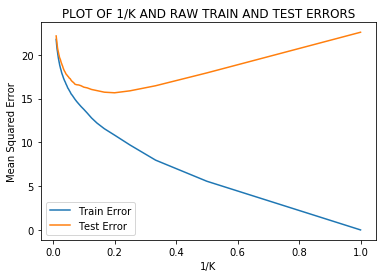

In [587]:
train_error=[]
test_error=[]
bestK=0
best_score=0
xtrain,xtest,ytrain,ytest=train_test_split(data.loc[:,data.columns!="PE"],data.loc[:,data.columns=="PE"],test_size=0.3,random_state=0)
for k in range(1,101,1):
    reg=KNeighborsRegressor(n_neighbors=k)
    reg.fit(xtrain,ytrain)
    test_pred=reg.predict(xtest)
    train_pred=reg.predict(xtrain)
    test_error.append(mean_squared_error(ytest,test_pred))
    train_error.append(mean_squared_error(ytrain,train_pred))
    score=reg.score(xtest,ytest)
    if best_score < score:
        best_score=score
        bestK=k
        
print("\n Optimal K is:",bestK,"\n")
x_axis=[]
for i in range(1,101,1):
    x_axis.append(1/i)
plt.title("PLOT OF 1/K AND RAW TRAIN AND TEST ERRORS")
plt.plot(x_axis,train_error,label="Train Error")
plt.plot(x_axis,test_error,label="Test Error")
plt.legend()
plt.xlabel("1/K")
plt.ylabel("Mean Squared Error")


In [588]:
min_test_error_KNN=min(test_error)

KNN regression after normalization


 Optimal K is: 6 



Text(0, 0.5, 'Mean Squared Error')

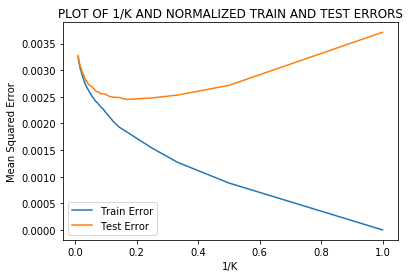

In [580]:
from sklearn import preprocessing as pro
train_error=[]
test_error=[]
bestK=0
best_score=0
df=data
normalized_data=(df-df.min())/(df.max()-df.min())
xtrain,xtest,ytrain,ytest=train_test_split(normalized_data.loc[:,normalized_data.columns!="PE"],normalized_data.loc[:,normalized_data.columns=="PE"],test_size=0.3,random_state=0)
for k in range(1,101,1):
    reg=KNeighborsRegressor(n_neighbors=k)
    reg.fit(xtrain,ytrain)
    test_pred=reg.predict(xtest)
    train_pred=reg.predict(xtrain)
    test_error.append(mean_squared_error(ytest,test_pred))
    train_error.append(mean_squared_error(ytrain,train_pred))
    score=reg.score(xtest,ytest)
    if best_score < score:
        best_score=score
        bestK=k
        
        
print("\n Optimal K is:",bestK,"\n")
x_axis=[]
for i in range(1,101,1):
    x_axis.append(1/i)
plt.title("PLOT OF 1/K AND NORMALIZED TRAIN AND TEST ERRORS")
plt.plot(x_axis,train_error,label="Train Error")
plt.plot(x_axis,test_error,label="Test Error")
plt.legend()
plt.xlabel("1/K")
plt.ylabel("Mean Squared Error")

In [581]:
print("Linear Regression least mean squared error",mean_squared_error(test_data['PE'],complete_model_test_predictions))

Linear Regression least mean squared error 17.56566959658244


In [589]:
print("KNN Regression least mean squared error",min_test_error_KNN)

KNN Regression least mean squared error 15.6635051689307


In [586]:
print("KNN regression performs better for this dataset")

KNN regression performs better for this dataset


ISLR: 2.4.1

(a) better -  more flexible model would fit the data well and with larger size a better fit would be obtained than an inflexible one

(b) worse - a flexible model would overfit the small number of observations

(c) better - with more degrees of freedom, a flexible model would obtain a
better fit as an inflexible model like linear regression would not be able to predict
the non linear behaviour of the data.

(d) worse - flexible methods fit to the noise in the error terms with high variance

ISLR: 2.4.7


              Obs.    X1   X2  X3 Distance(0, 0, 0)      Y
       ---------------------------------------------
               1      0    3    0   3                   Red 
               2      2    0    0   2                   Red
               3      0    1    3   sqrt(10) ~ 3.2      Red
               4      0    1    2   sqrt(5) ~ 2.2       Green
               5      -1   0    1   sqrt(2) ~ 1.4       Green
               6      1    1    1   sqrt(3) ~ 1.7       Red

(b) Green. Observation 5 is the closest neighbor for K = 1.

(c) Red. Observations 2, 5, 6 are the closest neighbors for K = 3. 2 is Red,
5 is Green, and 6 is Red.

(d) Small. A small K would be flexible for a non-linear decision boundary,
whereas a large K would try to fit a more linear boundary because it takes more
points into consideration.